In [1]:
import matplotlib.pyplot as plt
from clean import *

In [2]:
import matplotlib.pyplot as plt
params = {
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'text.usetex': False,
    #'figure.figsize': [4.5, 4.5],
    'figure.figsize': [6,6],
    #----------
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'image.cmap': 'jet',
    'legend.frameon':  False,
    'xtick.top': True,
    'ytick.right': True,
    #----------
    'lines.linewidth': 2.0,
#    'axes.labelsize': 12,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.minor.top': True, 
    'xtick.minor.bottom': True, 
    'ytick.minor.left': True, 
    'ytick.minor.right': True,
   }
plt.rcParams.update(params)

In [3]:
da = DATA()
da.Test = True
da.Test = False

### get filenames

In [4]:
fndict = da.getfilename()

['wdsb2', 'wd', 'fgkm', 'hotstars', 'yso', 'cv', 'list']
['wdsb2', 'wd', 'fgkm', 'hotstars', 'yso', 'cv']
wdsb2 203 --> 203
wd 7842 --> 7842
fgkm 8447 --> 8447
hotstars 864 --> 864
yso 331 --> 331
cv 135 --> 135


In [5]:
print fndict['cv'].keys()

['dir', 'len', 'fname']


### seperate the dataset to training, valid and test

In [6]:
fndict = da.seltrainset(fndict) 

In [7]:
print fndict['cv'].keys()

['train', 'len_valid', 'len', 'valid', 'fname', 'len_train', 'test', 'len_test', 'dir']


### read data

In [8]:
data = da.loaddata(fndict, fmt='train')

cv 5


In [10]:
for i in data['wd'].keys():
    print data['wd'][i]['wave'].min(), data['wd'][i]['wave'].max()


KeyError: 'wd'

['wdsb2', 'wd', 'yso', 'hotstars', 'fgkm', 'cv']
['cv_2', 'cv_3', 'cv_0', 'cv_1', 'cv_6', 'cv_7', 'cv_4', 'cv_5', 'cv_8', 'cv_9']
['index', 'wave', 'label', 'flux', 'sptype']


(3900, 9000)

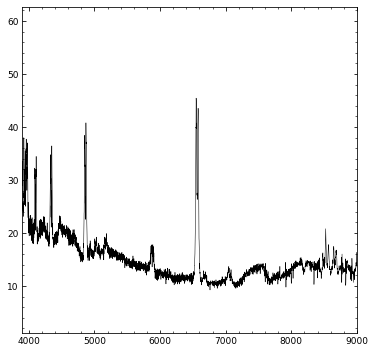

In [9]:
print data.keys()
print data['cv'].keys()
print data['cv']['cv_0'].keys()
plt.plot(data['cv']['cv_0']['wave'], data['cv']['cv_0']['flux'], 'k-', lw=0.5)
plt.xlim([3900,9000])

### interpolating spectra and smoothing by a Gaussian kernel with $\sigma=20 nm$

In [10]:
data_set = da.smooth(wavenew, data, sigma=200)

In [11]:
print data_set.keys()
print data_set['cv'].dtype
print data_set['cv'][0]['flux_norm'].shape

['wdsb2', 'wd', 'yso', 'hotstars', 'fgkm', 'cv']
[('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))]
(3000,)


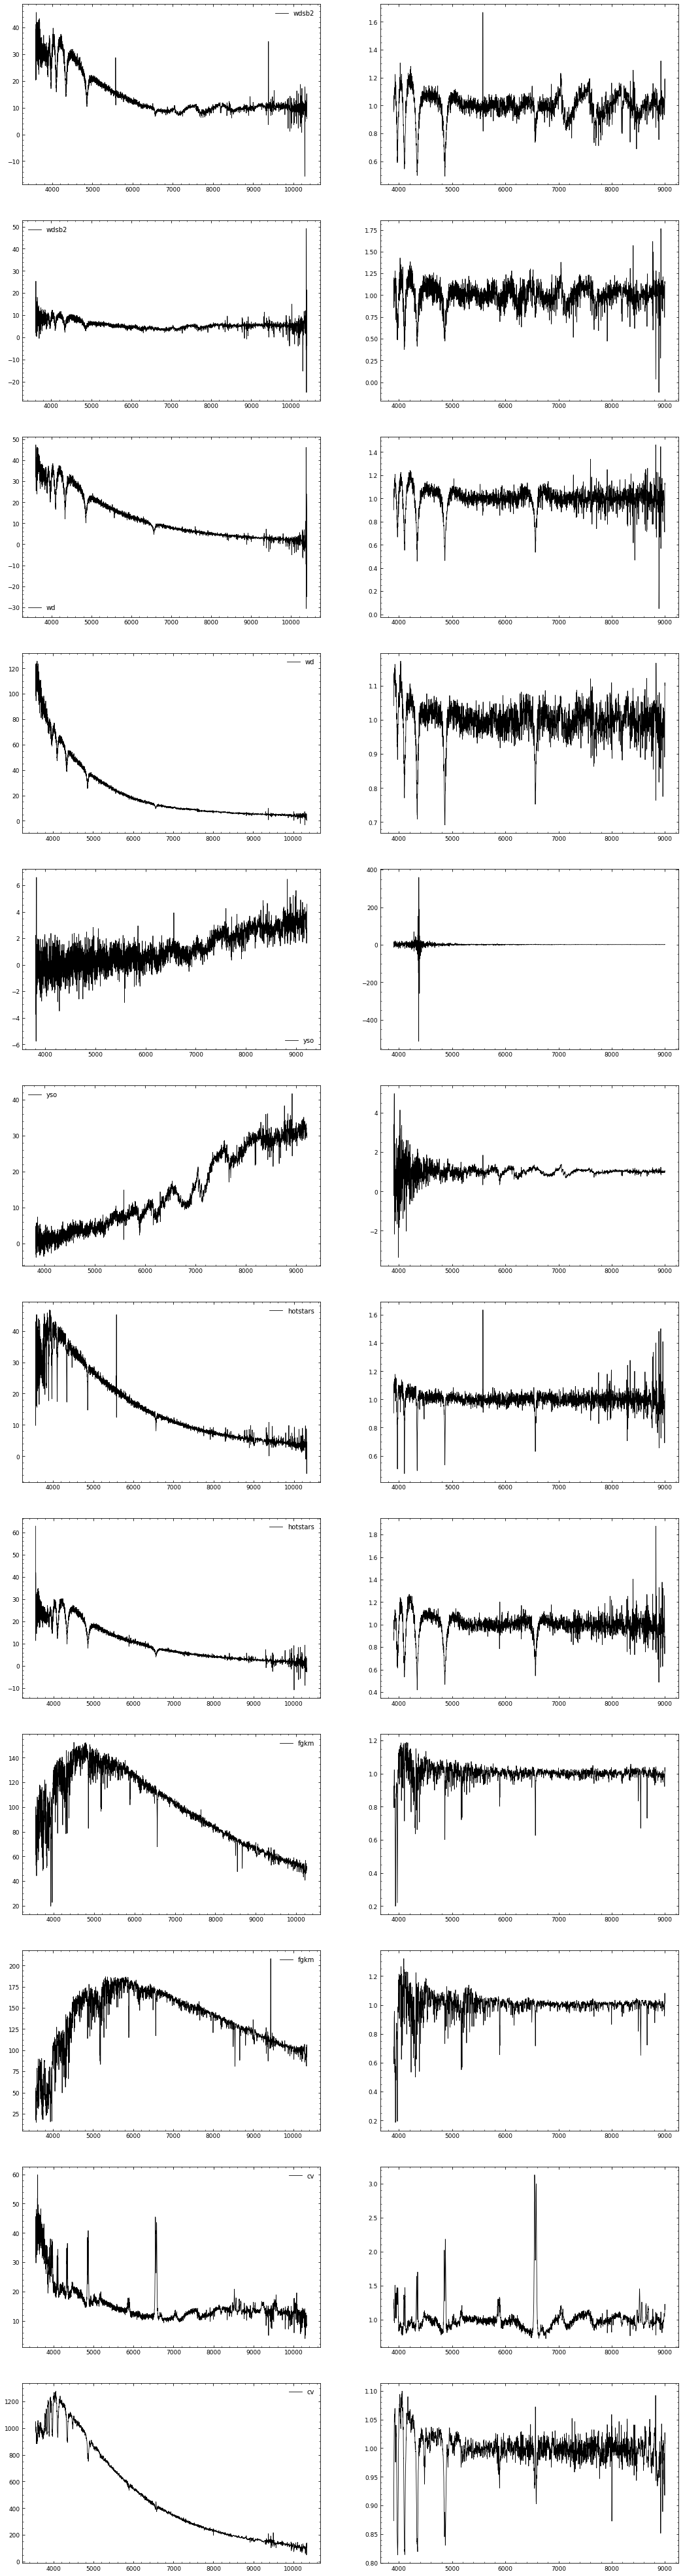

In [20]:
num = 12
fig, axes = plt.subplots(figsize=[18,6*num],nrows=num, ncols=2)
i = 0
for key in name_type.iterkeys():
    for n in xrange(num/6):
        axes[i,0].plot(data[key][key+'_%d'%(data_set[key][n]['index'])]['wave'], data[key][key+'_%d'%(data_set[key][n]['index'])]['flux'], 'k-', lw=0.8, label=key)
        axes[i,1].plot(wavenew, data_set[key]['flux_norm'][n], 'k-', lw=0.8)
        [axes[i,j].legend() for j in range(2)]
        i+=1
        if i>=num:
            break

### Norm

In [21]:
da.get_musigma(data_set)

### random oversampling

In [22]:
subdataset = da.oversampling(data_set['cv'], 20)

### save data

In [23]:
da.save('training_cv.npy', subdataset)
da.save('training_wd.npy', data_set['wd'])

### check

In [24]:
for key in name_type.keys():
    a = np.load('/nfs/P100/SDSSV_Classifiers/processed_dataset/dataset/train_%s.npy'%key)
    print key, a.dtype, a.shape, a['index']
for key in name_type.keys():
    a = np.load('/nfs/P100/SDSSV_Classifiers/processed_dataset/dataset/valid_%s.npy'%key)
    print key, a.dtype, a.shape
for key in name_type.keys():
    a = np.load('/nfs/P100/SDSSV_Classifiers/processed_dataset/dataset/test_%s.npy'%key)
    print key, a.dtype, a.shape

wdsb2 [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (20,) [0 1 2 3 4 5 6 7 8 9 9 0 7 8 8 9 0 6 6 5]
wd [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (20,) [0 1 2 3 4 5 6 7 8 9 7 5 9 7 3 8 2 3 0 9]
yso [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (20,) [0 1 2 3 4 5 6 7 8 9 8 7 7 6 5 9 6 9 4 4]
hotstars [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (20,) [0 1 2 3 4 5 6 7 8 9 9 3 5 4 6 8 6 7 0 4]
fgkm [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (10,) [0 1 2 3 4 5 6 7 8 9]
cv [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (20,) [0 1 2 3 4 5 6 7 8 9 2 9 1 0 6 5 7 9 8 9]
wdsb2 [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (10,)
wd [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (10,)
yso [('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))] (10,)
hotstars [('index', '<i4'), ('label', '<i4'), ('flux_norm',

In [27]:
a = np.load('/nfs/P100/SDSSV_Classifiers/processed_dataset/dataset/train_%s.npy'%'fgkm')
print a.shape
print a.dtype
print np.sum(a['label']==-1)

(6751,)
[('index', '<i4'), ('label', '<i4'), ('flux_norm', '<f4', (3000,))]
0


In [21]:
print a.shape
a[3] = -1.
a['index']

(10,)


array([1153041176,          0,          0,         -1,          0,
                0,          0,          0,          0,          0],
      dtype=int32)